# Nearest Neighbor Heuristic

**Authors**: Ben Morris, Daniel Park, Jess Brown, Han Vakil

In [1]:
import networkx as nx
import random
from utils import random_graph
import math

C:\Users\jbrown\AppData\Local\Programs\Python\Python39\lib\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jbrown\AppData\Local\Programs\Python\Python39\lib\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\jbrown\AppData\Local\Programs\Python\Python39\lib\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
"""
Docstring placeholder
"""

def tsp_nearest_neighbor(graph):
    nx.draw(graph, nx.get_node_attributes(graph, 'pos'))
    solution_path = []
    seen = set()
    length = 0
    start_city = 0
    print(f"Len graph is {len(graph)}")
    print(f"start city is {start_city}")
    curr_city = start_city
    all_cities_visited = False
    solution_path.append(start_city)
    seen.add(start_city)
    print(f"Solution path is {solution_path}")
    while len(seen) < len(graph):
        # Find nearest unvisited city and make that current city - add to solution path 
        nearest = find_nearest_city(curr_city, graph, seen)
        solution_path.append(nearest)
        seen.add(nearest)
        print(f"Solution path is {solution_path}")
        length += graph[curr_city][nearest]['weight']
        curr_city = nearest
    # Return to the start city once you have visited every city  
    solution_path.append(start_city)
    length += graph[curr_city][start_city]['weight']
    # Return path
    print(f"The solution path is {solution_path}")
    return length, solution_path

"""
Docstring placeholder
"""

def find_nearest_city(curr_city_index, graph, solution_path) -> int:
    return min((i for i in range(len(graph)) if i not in solution_path), key=lambda i: graph[curr_city_index][i]['weight'])

Len graph is 10
start city is 0
Solution path is [0]
Solution path is [0, 7]
Solution path is [0, 7, 4]
Solution path is [0, 7, 4, 6]
Solution path is [0, 7, 4, 6, 5]
Solution path is [0, 7, 4, 6, 5, 3]
Solution path is [0, 7, 4, 6, 5, 3, 2]
Solution path is [0, 7, 4, 6, 5, 3, 2, 8]
Solution path is [0, 7, 4, 6, 5, 3, 2, 8, 1]
Solution path is [0, 7, 4, 6, 5, 3, 2, 8, 1, 9]
The solution path is [0, 7, 4, 6, 5, 3, 2, 8, 1, 9, 0]
Shortest path is [0, 7, 4, 6, 5, 3, 2, 8, 1, 9, 0] with length 3.016


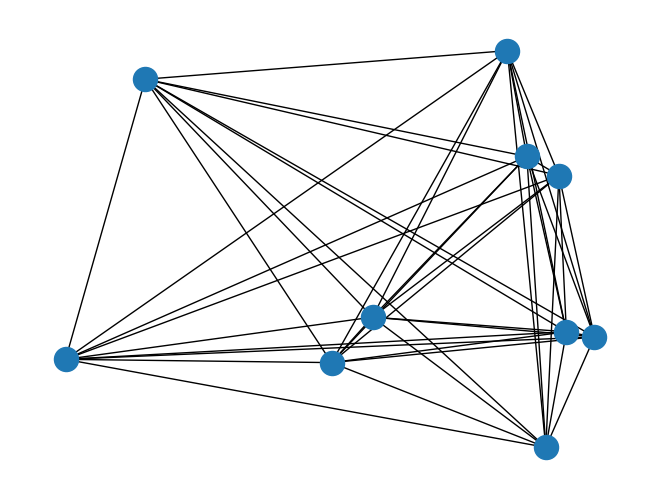

In [3]:
# Undirected, complete graph
n = 10
graph = random_graph(n)
length, path = tsp_nearest_neighbor(graph)
print(f'Shortest path is {path} with length {length:.3f}')

Len graph is 10
start city is 0
Solution path is [0]
Solution path is [0, 1]
Solution path is [0, 1, 2]
Solution path is [0, 1, 2, 3]
Solution path is [0, 1, 2, 3, 6]
Solution path is [0, 1, 2, 3, 6, 7]
Solution path is [0, 1, 2, 3, 6, 7, 9]
Solution path is [0, 1, 2, 3, 6, 7, 9, 4]
Solution path is [0, 1, 2, 3, 6, 7, 9, 4, 8]
Solution path is [0, 1, 2, 3, 6, 7, 9, 4, 8, 5]
The solution path is [0, 1, 2, 3, 6, 7, 9, 4, 8, 5, 0]
Shortest path is [0, 1, 2, 3, 6, 7, 9, 4, 8, 5, 0] with length 2.647


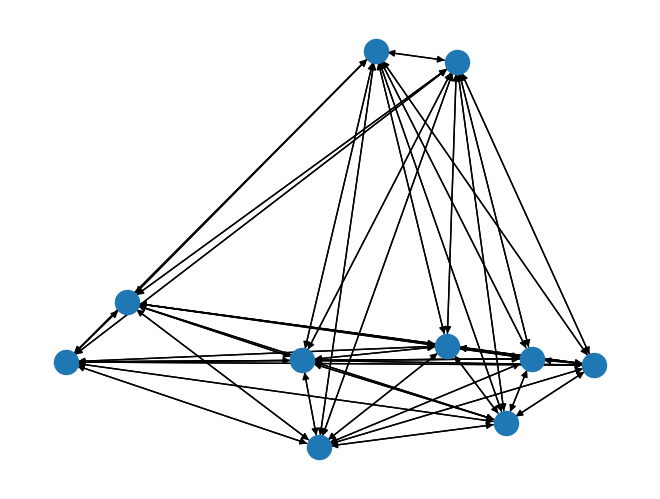

In [4]:
# Directed, complete
graph = random_graph(n, True)
length, path = tsp_nearest_neighbor(graph)
print(f'Shortest path is {path} with length {length:.3f}')

Len graph is 10
start city is 0
Solution path is [0]


KeyError: 8

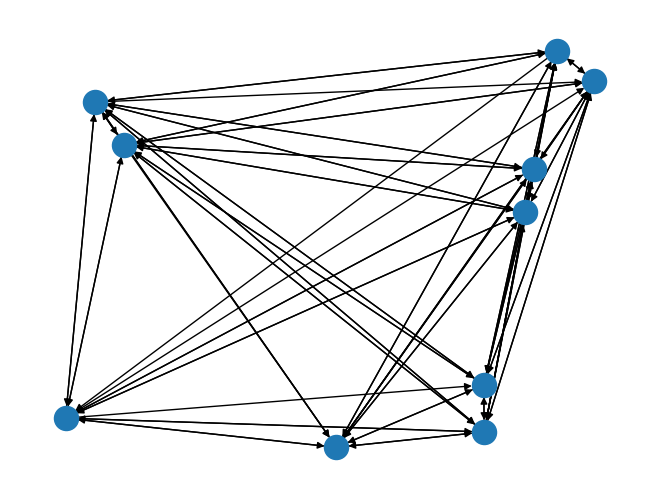

In [5]:
# Directed, incomplete
n = 10
graph = random_graph(n, True)
is_complete = False
if not is_complete:
    for i in range(0, math.floor(n / 2)):
        edges_to_remove = random.sample(range(0,n-1), 2)
        graph.remove_edge(edges_to_remove[0], edges_to_remove[1])
length, path = tsp_nearest_neighbor(graph)
print(f'Shortest path is {path} with length {length:.3f}')

Len graph is 10
start city is 0
Solution path is [0]
Solution path is [0, 1]
Solution path is [0, 1, 2]
Solution path is [0, 1, 2, 3]
Solution path is [0, 1, 2, 3, 4]
Solution path is [0, 1, 2, 3, 4, 5]
Solution path is [0, 1, 2, 3, 4, 5, 6]
Solution path is [0, 1, 2, 3, 4, 5, 6, 7]
Solution path is [0, 1, 2, 3, 4, 5, 6, 7, 8]
Solution path is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
The solution path is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


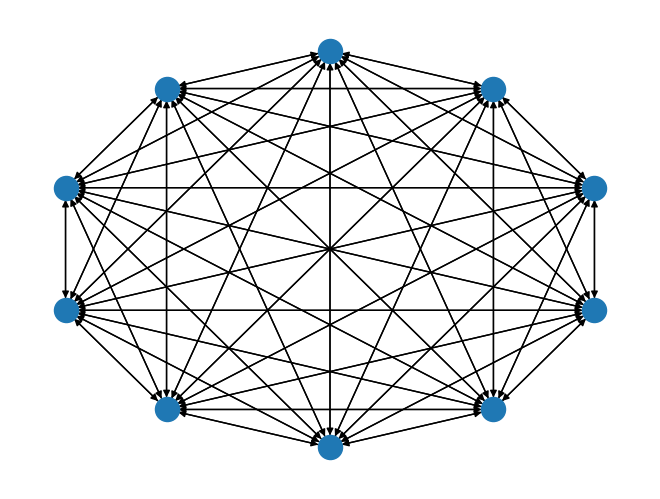

In [7]:
from utils import circle_graph
n = 10
graph = circle_graph(n)
length, path = tsp_nearest_neighbor(graph)

Len graph is 10
start city is 0
Solution path is [0]
Solution path is [0, 1]
Solution path is [0, 1, 2]
Solution path is [0, 1, 2, 3]
Solution path is [0, 1, 2, 3, 4]
Solution path is [0, 1, 2, 3, 4, 9]
Solution path is [0, 1, 2, 3, 4, 9, 8]
Solution path is [0, 1, 2, 3, 4, 9, 8, 7]
Solution path is [0, 1, 2, 3, 4, 9, 8, 7, 6]
Solution path is [0, 1, 2, 3, 4, 9, 8, 7, 6, 5]
The solution path is [0, 1, 2, 3, 4, 9, 8, 7, 6, 5, 0]
length is 10.0
path is [0, 1, 2, 3, 4, 9, 8, 7, 6, 5, 0]


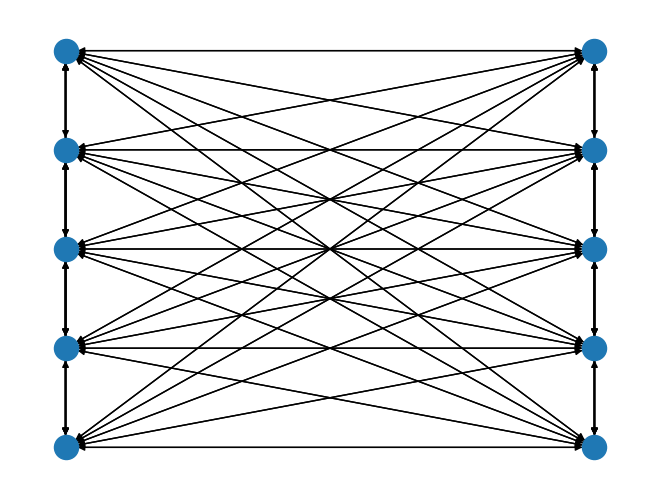

In [9]:
from utils import rectangle_graph
graph = rectangle_graph((2,5))
length, path = tsp_nearest_neighbor(graph)
print(f"length is {length}")
print(f"path is {path}")

Len graph is 20
start city is 0
Solution path is [0]
Solution path is [0, 8]
Solution path is [0, 8, 5]
Solution path is [0, 8, 5, 9]
Solution path is [0, 8, 5, 9, 2]
Solution path is [0, 8, 5, 9, 2, 6]
Solution path is [0, 8, 5, 9, 2, 6, 7]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14, 13]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14, 13, 15]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14, 13, 15, 18]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14, 13, 15, 18, 16]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14, 13, 15, 18, 16, 12]
Solution path is [0, 8, 5, 9, 2, 6, 7, 3, 4, 1, 17, 19, 14, 13, 15, 18, 16, 12, 10]
Solution pa

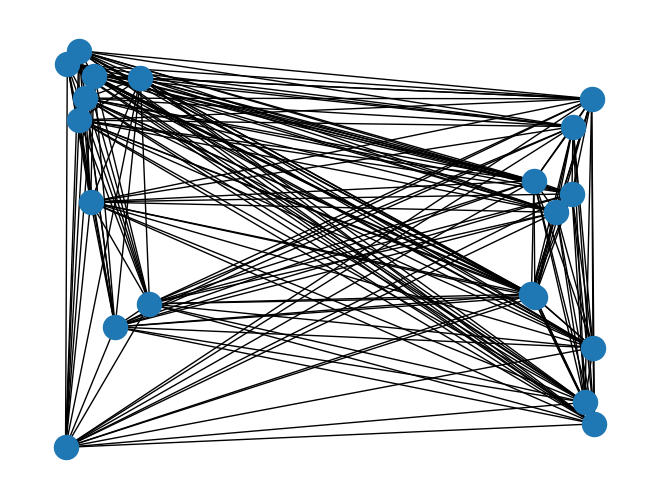

In [4]:
from utils import complete_barbell
graph = complete_barbell(20)
length, path = tsp_nearest_neighbor(graph)
print(f"length is {length}")
print(f"path is {path}")